# Analysis of Cab Industry for XYZ

Goal of this analysis is to figure out which company, Pink or Yellow, will be a better investment for XYZ.

# DataFrames

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cab_data_df = pd.read_csv("Cab_Data.csv", header=0)
transaction_ID_df = pd.read_csv("Transaction_ID.csv", header=0)
city_df = pd.read_csv("City.csv", header=0)
customer_ID_df = pd.read_csv("Customer_ID.csv", header=0)

pink_df = cab_data_df[cab_data_df['Company'] == 'Pink Cab']
yellow_df = cab_data_df[cab_data_df['Company'] == 'Yellow Cab']

# Average Profit Per Ride

Firstly, I will check which company averages more profit per ride.

The average profit per ride for the pink company is $62.65.
The average profit per ride for the yellow company is $160.26.


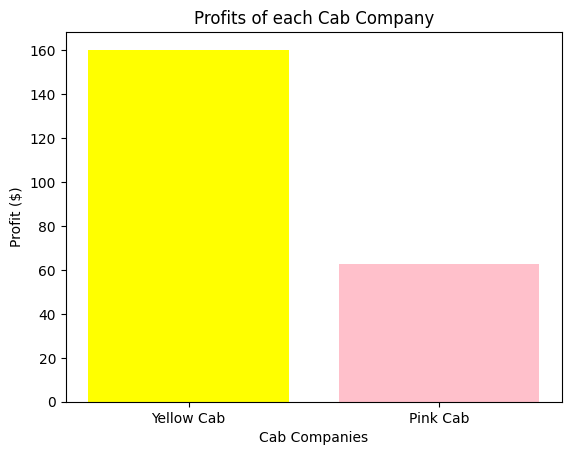

In [9]:
pink_df = pink_df.loc[:, :].copy()
pink_df['Profit'] = pink_df['Price Charged'] - pink_df['Cost of Trip']

yellow_df = yellow_df.loc[:, :].copy()
yellow_df['Profit'] = yellow_df['Price Charged'] - yellow_df['Cost of Trip']

pink_average_profit = round(pink_df['Profit'].sum() / len(pink_df), 2)
yellow_average_profit = round(yellow_df['Profit'].sum() / len(yellow_df), 2)

print(f"The average profit per ride for the pink company is ${pink_average_profit}.")
print(f"The average profit per ride for the yellow company is ${yellow_average_profit}.")

plt.bar(['Yellow Cab', 'Pink Cab'], [yellow_average_profit, pink_average_profit], color=['yellow', 'pink'])

plt.title('Profits of each Cab Company')
plt.xlabel('Cab Companies')
plt.ylabel('Profit ($)')

plt.show()

Yellow Company has around $100 more in profit per ride.

# Popular Cities and the Cab Company presiding in them

Next, I would like to figure out which cities have the most amount of cab transactions. Then, I would like to see which company is more popular in each city.

In [ ]:
popular_cities = cab_data_df.City.value_counts()
print(popular_cities)

The largest cities include New York, Chicago, Los Angeles, Washington, Boston, San Diego. I will use these 6 cities and figure out the percentage of Pink and Yellow Cabs.

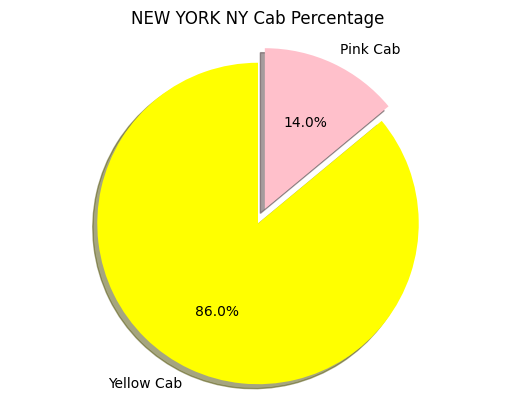

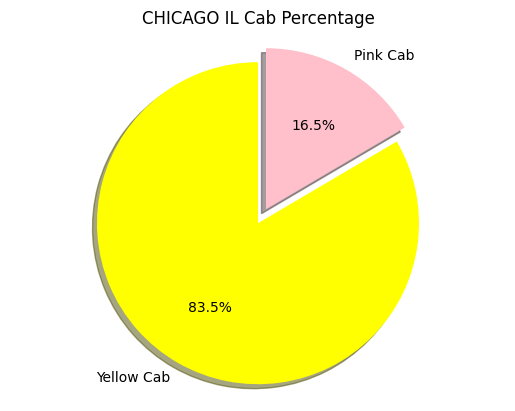

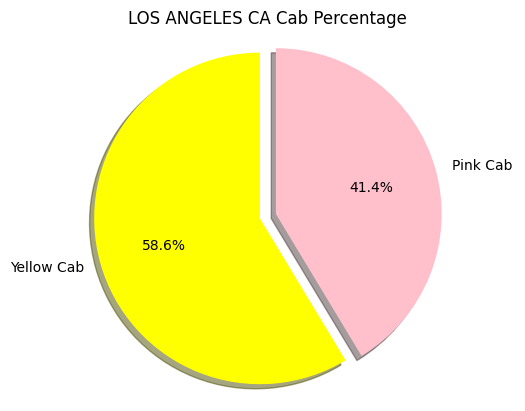

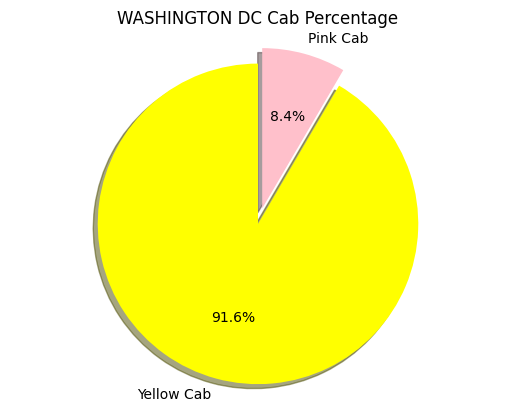

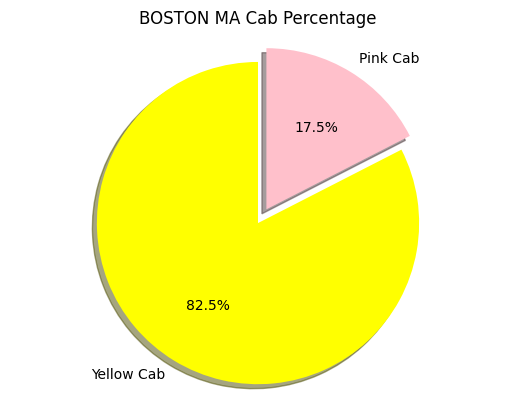

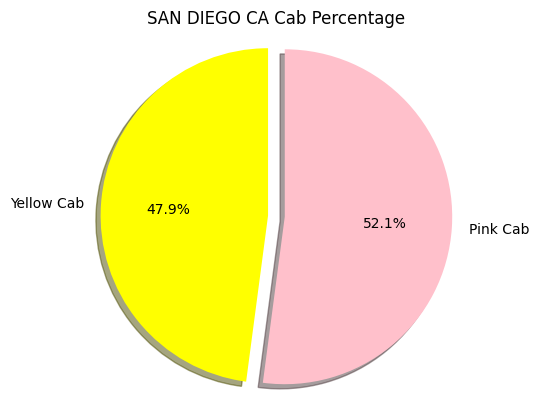

In [23]:
city_dict = {}
cities = ["NEW YORK NY", "CHICAGO IL", "LOS ANGELES CA", "WASHINGTON DC", "BOSTON MA", "SAN DIEGO CA"]

for city in cities:
    city_df = cab_data_df[cab_data_df['City'] == city]
    city_dict[city] = city_df

city_dict_percentage = {}
for city in city_dict:
    bottom = len(city_dict[city])
    top = len(city_dict[city][city_dict[city]['Company'] == "Yellow Cab"])
    percentage = round((top / bottom) * 100, 2)
    city_dict_percentage[city] = percentage


for city in city_dict_percentage:
    sizes = [city_dict_percentage[city], 100 - city_dict_percentage[city]]
    labels = ['Yellow Cab', 'Pink Cab']
    colors = ['Yellow', 'Pink']
    explode = [0.1, 0]
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'{city} Cab Percentage')
    plt.show()

Yellow Cab has a higher percentage of transactions in 5 out of the 6 biggest cities. They only barely lost in San Diego by 2%.

# Average KM traveled per ride

Next, I would like to see which company has travelled more KMs. This will give me a better indication of the difference in volume of taxes between the two companies.

The KM travelled for the pink company is 1911073.11 KMs.
The KM travelled for the yellow company is 6199417.47 KMs.


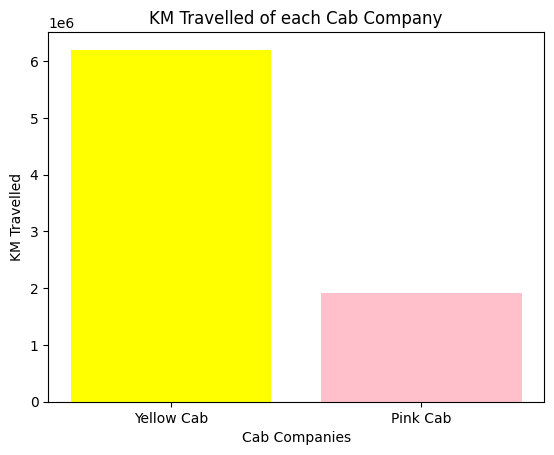

In [18]:
pink_distance = round(pink_df['KM Travelled'].sum(),2)
yellow_distance = round(yellow_df['KM Travelled'].sum(),2)

print(f"The KM travelled for the pink company is {pink_distance} KMs.")
print(f"The KM travelled for the yellow company is {yellow_distance} KMs.")

plt.bar(['Yellow Cab', 'Pink Cab'], [yellow_distance, pink_distance], color=['yellow', 'pink'])

plt.title('KM Travelled of each Cab Company')
plt.xlabel('Cab Companies')
plt.ylabel('KM Travelled')

plt.show()

# Amount of Transactions for each Company

Next, I would like to analyze which company is making more transactions. My presumption is the Yellow Cab Company will have significantly more.

In [22]:
pink_transactions = len(pink_df)
yellow_transactions = len(yellow_df)

print(f"The total amount of transactions made by the pink company is {pink_transactions:,}.")
print(f"The total amount of transactions made by the yellow company is {yellow_transactions:,}.")
print(f"The yellow company has made {yellow_transactions-pink_transactions:,} more transactions.")

The total amount of transactions made by the pink company is 84,711.
The total amount of transactions made by the yellow company is 274,681.
The yellow company has made 189,970 more transactions.


# Percent of Cash and Credit Transactions for each Company

Finally, I would like to analyze each company and whether majority of their transaction are with cash or card.

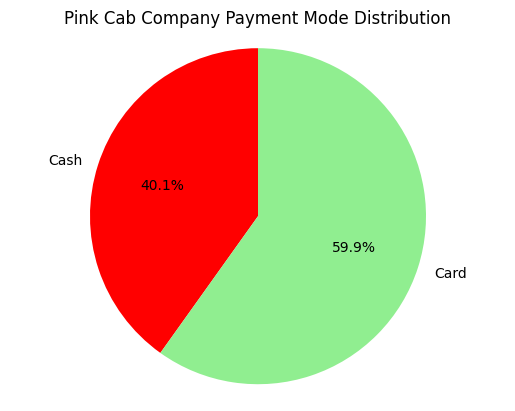

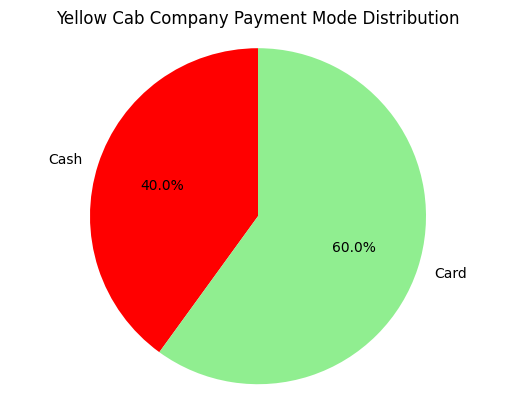

In [28]:
merged_df = pd.merge(cab_data_df, transaction_ID_df, on='Transaction ID')

pink_merged_df = merged_df[merged_df['Company'] == 'Pink Cab']
yellow_merged_df = merged_df[merged_df['Company'] == 'Yellow Cab']

pink_cash_pct = round((pink_merged_df[pink_merged_df['Payment_Mode'] == 'Cash'].shape[0] / pink_df.shape[0]) * 100, 2)
yellow_cash_pct = round((yellow_merged_df[yellow_merged_df['Payment_Mode'] == 'Cash'].shape[0] / yellow_df.shape[0]) * 100, 2)

labels = ['Cash', 'Card']
sizes = [pink_cash_pct, 100 - pink_cash_pct]
colors = ['red', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pink Cab Company Payment Mode Distribution')
plt.show()

labels = ['Cash', 'Card']
sizes = [yellow_cash_pct, 100 - yellow_cash_pct]
colors = ['red', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Yellow Cab Company Payment Mode Distribution')
plt.show()


Both companies have an equal distribution of payment method with majority being card transactions.

# Conclusion

Following my analysis, I recommend that XYZ invest in the Yellow Cab Company. I've decided this would be the best investment because:
- The Yellow Cab Company makes more profit per ride
- The Yellow Cab Company is significantly more popular in 5/6 of the most populous cities.
- The Yellow Cab Company is travelling more KM's by a significant amount.
- The Yellow Cab Company has made almost over 200,000 transactions than the Pink Cab Company.